In [1]:
# initialization cell

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math
import time
import os
current_path = os.getcwd()
path_to_files = current_path + '/../sz_auxiliary_files/'
import matplotlib.patches as mpatches

font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

arcmin_to_radians = np.pi/(60.*180.)

In [2]:
# the parameters needed for the ksz calculations:
ksz_params = {
#fiducial ksz params

'k_min_for_pk_class_sz' : 0.001,
'k_max_for_pk_class_sz' : 60.0,
'k_per_decade_class_sz' : 50,
'P_k_max_h/Mpc' : 100.0,
# 'non linear' : 'halofit',


# 'sz_verbose' : 0, # for full output when not using python wrapper set to >100, this doesnt work with python wrapper

'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.001,



# 'nonlinear_verbose' : 0,
'ndim_masses' : 80,
'ndim_redshifts' : 80,
#'l_max_scalars' : 5000,



'n_ell_density_profile' : 50,
'n_m_density_profile' : 50,
'n_z_density_profile' : 50,
'k_per_decade_for_pk' : 50,
'z_max_pk' : 4.0,
    

# slow:
# 'n_z_psi_b1g' : 100,
# 'n_l_psi_b1g' : 400,

# 'n_z_psi_b2g' : 100,
# 'n_l_psi_b2g' : 400,

# 'n_z_psi_b2t' : 100,
# 'n_l_psi_b2t' : 400,

# 'n_z_psi_b1t' : 100,
# 'n_l_psi_b1t' : 100,

# 'n_z_psi_b1gt' : 100,
# 'n_l_psi_b1gt' : 100,
    
    
# fast:
'n_z_psi_b1g' : 50,
'n_l_psi_b1g' : 50,

'n_z_psi_b2g' : 50,
'n_l_psi_b2g' : 50,

'n_z_psi_b2t' : 50,
'n_l_psi_b2t' : 50,

'n_z_psi_b1t' : 50,
'n_l_psi_b1t' : 50,

'n_z_psi_b1gt' : 50,
'n_l_psi_b1gt' : 50,

'N_samp_fftw' : 800, # fast: 800 ;  slow: 2000
'l_min_samp_fftw' : 1e-9,
'l_max_samp_fftw' : 1e9,
    
'N_kSZ2_gal_multipole_grid' :  70,
'N_kSZ2_gal_theta_grid' :  70,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,
}

# the parameters needed for cosmology:

cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'h': 0.6766,
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

'k_pivot': 0.05,
'N_ncdm': 1,
'N_ur': 2.0328,
'm_ncdm': 0.06    

}

# the common parameters:

common_params = {

'z_min' : 0.005,
'z_max' : 4.0,
'M_min' : 7.0e8, 
'M_max' : 3.5e15,
    

'delta for galaxies' : "200c",
'delta for matter density' : "200c",
'mass function' : 'T08M200c',
'concentration parameter' : 'B13',

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.0005,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.0005,


'ell_max': 1600.0,
'ell_min': 2.0,
'dell': 10,

'non linear' : 'halofit',
'pk_nonlinear_for_vrms2' : 1,
'hm_consistency' : 1,
    
'f_free' : 1.0,
    

# 'ndim_masses': 150,
# 'ndim_redshifts': 150,

# 'P_k_max_h/Mpc': 50.0,
# 'k_min_for_pk_class_sz': 0.0001,
# 'k_max_for_pk_class_sz': 10.0,
# 'k_per_decade_class_sz': 20.0,
}


# HOD params for kSZ2-g

bestfit_blue_hod_params = {
'galaxy_sample': 'unwise',
'galaxy_sample_id': "blue",
'UNWISE_dndz_file' : "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_dndz_cosmos.txt",
# 'UNWISE_fdndz_file' : "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_fdndz.txt",

   

'sigma_log10M_HOD' : 0.69,
'alpha_s_HOD' :  1.30,
'M1_prime_HOD' : 5.03e12, # Msun/h
'M_min_HOD' : 6.25e11, # Msun/h
'cl_gal_gal_A_sn' : -0.26e-7, 
'x_out_truncated_nfw_profile_satellite_galaxies' : 1.09,


'M0_HOD':0,  # Msun/h
'M0 equal M_min (HOD)': 'no',
'x_out_truncated_nfw_profile':1.0,    
    
}

bestfit_green_hod_params = {
'galaxy_sample': 'unwise',
'galaxy_sample_id': "green",
'UNWISE_dndz_file' : "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_dndz_cosmos.txt",
   

'sigma_log10M_HOD' : 0.97,
'alpha_s_HOD' :  1.30,
'M1_prime_HOD' : 2.76e13, # Msun/h
'M_min_HOD' : 1.34e13, # Msun/h
'cl_gal_gal_A_sn' : 1.38e-7, 
'x_out_truncated_nfw_profile_satellite_galaxies' : 2.75,


'M0_HOD':0,  # Msun/h
'M0 equal M_min (HOD)': 'no',
'x_out_truncated_nfw_profile':1.0,    
    
}


FERRARO, HILL +, Planck kSZ2-g

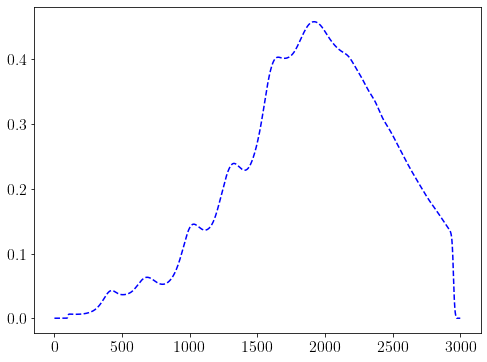

In [3]:
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',unpack=True)
plt.plot(l_planck,F_planck,label='ola planck',ls='--',c='b')

use fsky = 0.7 see table II of https://arxiv.org/pdf/1605.02722.pdf <br>
beam of 5 arcmin and noise of 47 uK as us in planck_nl.txt  <br>
multipole range : 100 - 3000  <br>
galaxy density:  50 million galaxies over half of the sky <br>
means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
galaxy bias assumed constant to be bg = 1.13 ± 0.02 (see fig 7 of https://arxiv.org/pdf/1605.02722.pdf)

WISE redshift distribution:

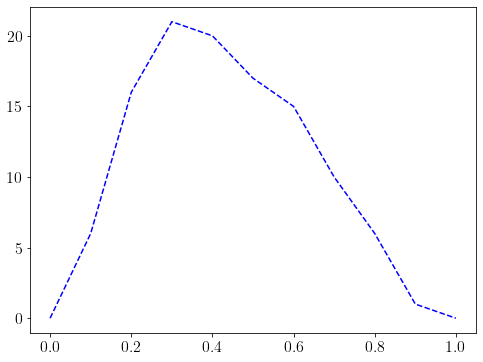

In [63]:
z, dnwise = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise.txt',unpack=True)
plt.plot(z,dnwise,label='wise dndz',ls='--',c='b')

In [210]:
#blue unwise shot noise:
shot_noise = (3409/3.046174198e-4)**-1
shot_noise

8.935682599002641e-08

In [65]:
# np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',np.c_[z,dnwise/np.trapz(dnwise,z)])

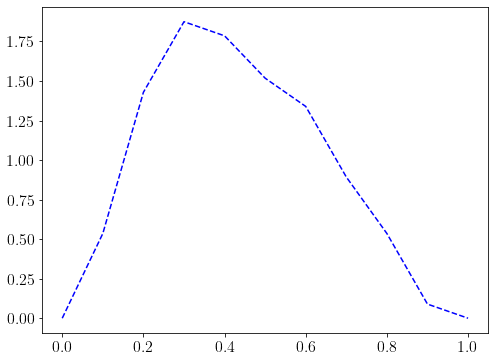

In [66]:
z, dnwise = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',unpack=True)
plt.plot(z,dnwise,label='wise dndz',ls='--',c='b')

In [67]:
np.trapz(dnwise,z)

0.9999999999999999

kSZ2-wise templates

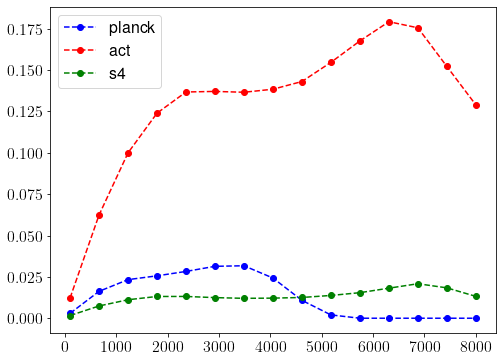

In [44]:
F = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/ksz2g_wise_simone16template.txt')
ls = F[0,:]
cls_planck = F[1,:]
cls_advact = F[2,:]
cls_s4 = F[3,:]
plt.plot(ls,cls_planck,label='planck',ls='--',c='b',marker='o')
plt.plot(ls,cls_advact,label='act',ls='--',c='r',marker='o')
plt.plot(ls,cls_s4,label='s4',ls='--',c='g',marker='o')
plt.legend()

In [76]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_in_num_filter_functions_l_fl_190122.txt',



        
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 88.6796 seconds


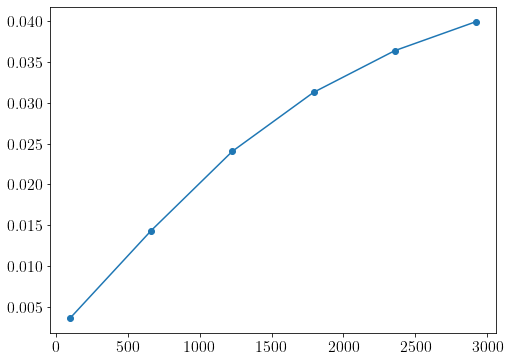

In [77]:
plt.plot(M.cl_gg()['ell'],np.asarray(M.cl_gg()['hf'])/1**2,marker='o')

In [78]:
M.cl_t2t2f()

{'ell': [100.0, 664.0, 1228.0, 1792.0, 2356.0, 2920.0],
 't2t2f': [4.977397041146142e-27,
  4.413516741649082e-27,
  3.429374691763428e-27,
  2.3038948059109304e-27,
  1.3007305292441285e-27,
  5.814487214271823e-28]}

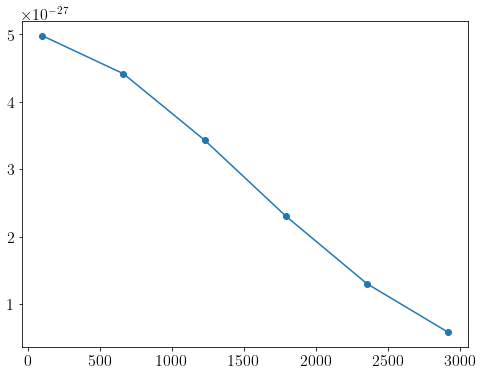

In [79]:
plt.plot(M.cl_t2t2f()['ell'],M.cl_t2t2f()['t2t2f'],marker='o')

In [80]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 3000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

2.073580422505847
4.147160845011694


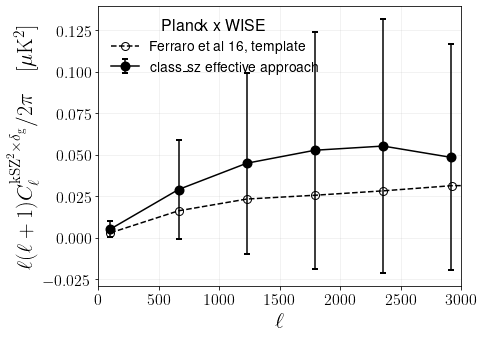

In [81]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll),
            marker='o',
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label='class\_sz effective approach',
            c='k')
ax.plot(ls,
        cls_planck,
        label='Ferraro et al 16, template',
        ls='--',
        c='k',
        markerfacecolor='None',
        markersize=8,
        marker='o')
# ax.plot(l,fac_plc*cl_lensing)
ax.legend(title='Planck x WISE',
          loc=2,
          frameon=False,
          fontsize=14)
ax.set_xlim(0.,3000)

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^{\mathrm{kSZ}^2\times\delta_\mathrm{g}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

ax.grid(which='both',alpha=0.2)
fig.tight_layout()
# plt.savefig('Planck_WISE.pdf')


with unWISE blue and Planck
but shot noise determined by 1/nbar, ie 
#blue unwise shot noise:
shot_noise = (3409/3.046174198e-4)**-1


In [83]:
shot_noise = (3409/3.046174198e-4)**-1
shot_noise

8.935682599002641e-08

In [101]:
shot_noise = (1846/3.046174198e-4)**-1
shot_noise

1.6501485362946912e-07

In [102]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

# 'galaxy_sample': 'unwise',
'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_in_num_filter_functions_l_fl_190122.txt',



        
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 66.7438 seconds


In [103]:
M.cl_t2t2f()

{'ell': [100.0, 664.0, 1228.0, 1792.0, 2356.0, 2920.0],
 't2t2f': [4.977397041146142e-27,
  4.413516741649082e-27,
  3.429374691763428e-27,
  2.3038948059109304e-27,
  1.3007305292441285e-27,
  5.814487214271823e-28]}

In [104]:
0.42/0.31*2.

2.7096774193548385

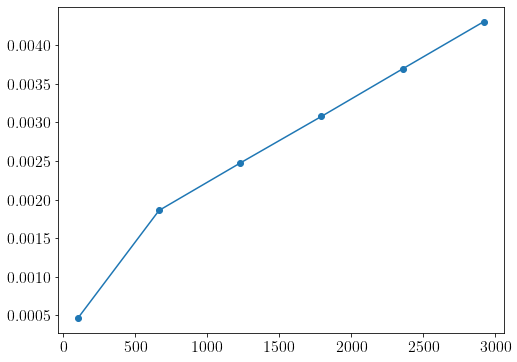

In [105]:
plt.plot(M.cl_gg()['ell'],np.asarray(M.cl_gg()['hf'])/1**2,marker='o')

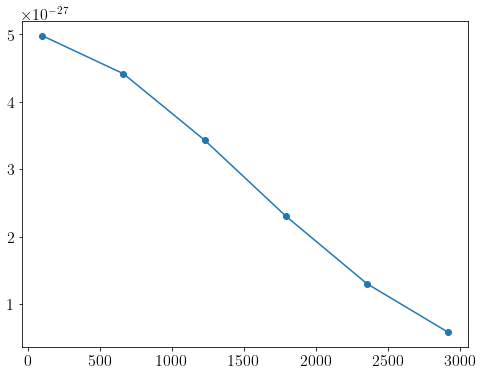

In [106]:
plt.plot(M.cl_t2t2f()['ell'],M.cl_t2t2f()['t2t2f'],marker='o')

In [107]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 3000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

0.40683536504683127
0.8136707300936625


In [93]:
(4.1-5.2)/(4.1+5.2)*2.

-0.23655913978494633

In [128]:
# Ferraro + : 0.155 see https://arxiv.org/pdf/1605.02722.pdf
M.get_f_b()


0.15745030410017352

In [129]:
M.get_f_free()

1.0

FERRARO, HILL +, AdvACT kSZ2-g

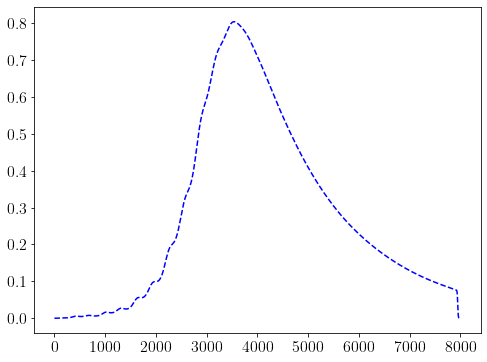

In [130]:
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',unpack=True)
plt.plot(l_planck,F_planck,label='colin advact',ls='--',c='b')

use fsky = 0.5 see table II of https://arxiv.org/pdf/1605.02722.pdf <br>
beam of 1.4 arcmin and noise of 10 uK see Table I of  https://arxiv.org/pdf/1605.02722.pdf <br>
multipole range : 100 - 8000  <br>
galaxy density:  50 million galaxies over half of the sky <br>
means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
galaxy bias assumed constant to be bg = 1.13 ± 0.02 (see fig 7 of https://arxiv.org/pdf/1605.02722.pdf)

WISE redshift distribution:

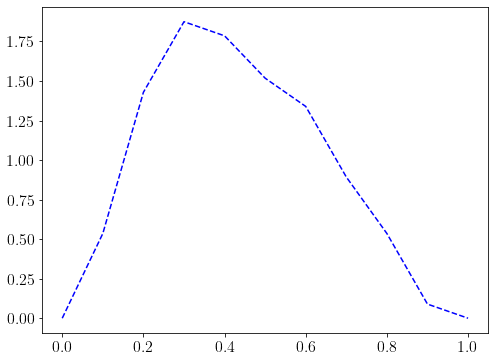

In [131]:
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',unpack=True)
plt.plot(l_planck,F_planck,label='wise dndz',ls='--',c='b')

kSZ2-wise templates

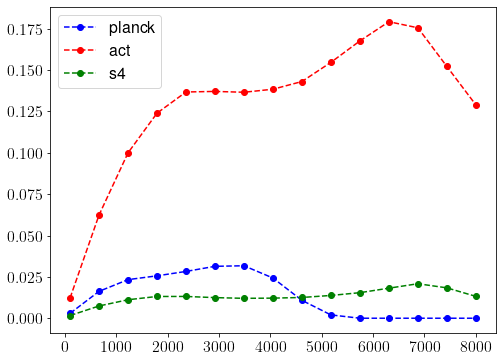

In [132]:
F = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/ksz2g_wise_simone16template.txt')
ls = F[0,:]
cls_planck = F[1,:]
cls_advact = F[2,:]
cls_s4 = F[3,:]
plt.plot(ls,cls_planck,label='planck',ls='--',c='b',marker='o')
plt.plot(ls,cls_advact,label='act',ls='--',c='r',marker='o')
plt.plot(ls,cls_s4,label='s4',ls='--',c='g',marker='o')
plt.legend()

In [50]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',
'galaxy_sample': 'custom',
'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/advact_nl_10uk_1p4arcmin.txt',

        
'pk_nonlinear_for_vrms2' : 0,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.5, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.2566370614359172e-07, 
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 144.3699 seconds


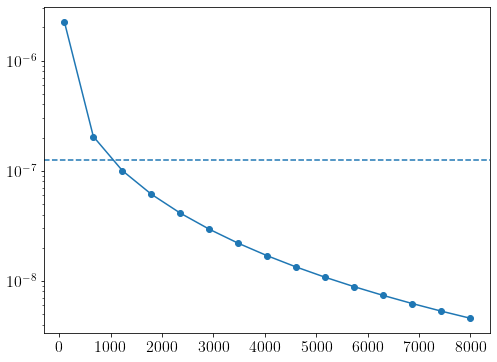

In [51]:
plt.plot(M.cl_gg()['ell'],np.asarray(M.cl_gg()['hf'])/(np.asarray(M.cl_t2t2f()['ell'])*(np.asarray(M.cl_t2t2f()['ell'])+1.)/2./np.pi),marker='o')
plt.axhline(M.A_sn(),ls='--')
plt.yscale('log')

In [52]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

102.74933805205761
205.49867610411522


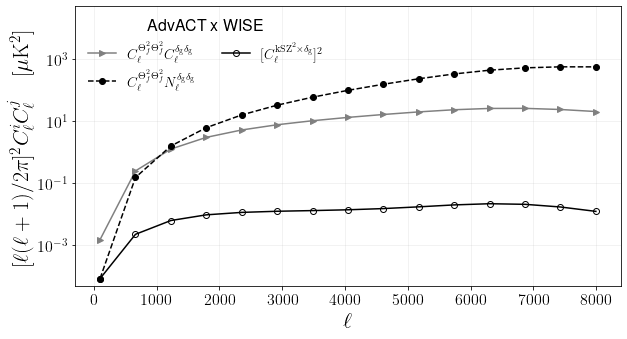

In [75]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1




fac_dl = (2.726e6)**2*np.asarray(M.cl_t2t2f()['ell'])*(np.asarray(M.cl_t2t2f()['ell'])+1.)/2./np.pi

den =  1.#(2.*np.asarray(M.cl_t2t2f()['ell'])+1.)*np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))**2.

ya = fac_dl**2.*np.asarray(M.cl_t2t2f()['t2t2f'])*np.asarray(M.cl_gg()['hf'])/(np.asarray(M.cl_t2t2f()['ell'])*(np.asarray(M.cl_t2t2f()['ell'])+1.)/2./np.pi)
plt.plot(M.cl_t2t2f()['ell'],ya/den,marker='>',c='grey',
         label=r'$C_\ell^{\Theta_f^2\Theta_f^2}C_\ell^{\delta_\mathrm{g}\delta_\mathrm{g}}$')

ya = fac_dl**2.*np.asarray(M.cl_t2t2f()['t2t2f'])*M.A_sn()
plt.plot(M.cl_t2t2f()['ell'],ya/den,
         marker='o',
         label=r'$C_\ell^{\Theta_f^2\Theta_f^2}N_\ell^{\delta_\mathrm{g}\delta_\mathrm{g}}$',
         ls='--',
        c='k')

ya = fac_dl**2.*np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))**2.
plt.plot(M.cl_t2t2f()['ell'],ya/den,
         label=r'$[C_\ell^{\mathrm{kSZ}^2\times\delta_\mathrm{g}}]^2$',
         marker='o',
         markerfacecolor='None',
         c='k'
        )

# plt.yscale('log')
# plt.legend()
# plt.xlabel('multipole l')
# plt.ylabel('Normalized cov')

ax.set_yscale('log')

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$[\ell(\ell+1)/2\pi]^2C_\ell^i C_\ell^j\quad [\mathrm{\mu K^2}]$',size=title_size)

ax.grid(which='both',alpha=0.2)

ax.legend(title='AdvACT x WISE',
          loc=2,
          ncol=2,
          frameon=False,
          fontsize=14)
ax.set_ylim(5e-5,5e4)

fig.tight_layout()
plt.savefig('advACT_WISE_covmat_terms.pdf')

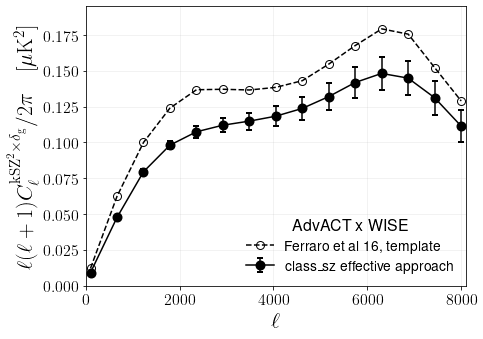

In [53]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5),sharey=True)

ax=ax1

# ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll),label='class\_sz effective approach')

# ax.plot(ls,cls_advact,label='simo template',ls='--',c='b',marker='o')
# ax.plot(l,fac_plc*cl_lensing)
# ax.legend(loc=2)


ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll),
            marker='o',
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label='class\_sz effective approach',
            c='k')
ax.plot(ls,
        cls_advact,
        label='Ferraro et al 16, template',
        ls='--',
        c='k',
        markerfacecolor='None',
        markersize=8,
        marker='o')
# ax.plot(l,fac_plc*cl_lensing)
ax.legend(title='AdvACT x WISE',
          loc=4,
          frameon=False,
          fontsize=14)
# ax.set_xlim(0.,3000)
ax.set_xlim(0.,8100)
ax.set_ylim(0.,0.195)

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^{\mathrm{kSZ}^2\times\delta_\mathrm{g}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

ax.grid(which='both',alpha=0.2)
fig.tight_layout()
plt.savefig('advACT_WISE.pdf')







In [54]:
# Ferraro + : 0.155 see https://arxiv.org/pdf/1605.02722.pdf
M.get_f_b()


0.15745030410017352

In [27]:
M.get_f_free()

1.0

AdvACT x unWISE

In [7]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',

'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',



        
# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 97.1793 seconds


In [9]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

7.942389722102383
15.884779444204765


In [10]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',

'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',



        
# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 111.2428 seconds


In [11]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

22.431731982622733
44.863463965245465


SO x unWISE

In [12]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/so_goal_filter_functions_l_fl_230222.txt',

'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/so_goal_nl.txt',



        
# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 10000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 112.0114 seconds


In [14]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 10000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

44.113683796629445
88.22736759325889


In [15]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/so_goal_filter_functions_l_fl_230222.txt',

'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/so_goal_nl.txt',



        
# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 10000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 134.9877 seconds


In [16]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 10000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

118.41681038329929
236.83362076659859


S4 x unWISE

In [17]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/s4_filter_functions_l_fl_230222.txt',

'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/s4_nl.txt',



        
# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 10000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 109.2018 seconds


In [19]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 10000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

90.75199588820173
181.50399177640347


In [24]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/s4_filter_functions_l_fl_230222.txt',

'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/s4_nl.txt',

        
# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 10000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 131.6360 seconds


In [25]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 10000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

234.3333141654223
468.6666283308446


In [26]:
468.7/181.5

2.5823691460055094

In [131]:
1.6501485362946912e-07/8.935682599002641e-08

1.8466955579631632

# Fisher analysis with bg and Aksz
we just focus on on advact x unwise blue and green
no need to redo the full list of SNRs

In [27]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_lens_hf,gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',

'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',



        
# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 102.7457 seconds


In [28]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['hf'])#np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

7.942389722102383
15.884779444204765


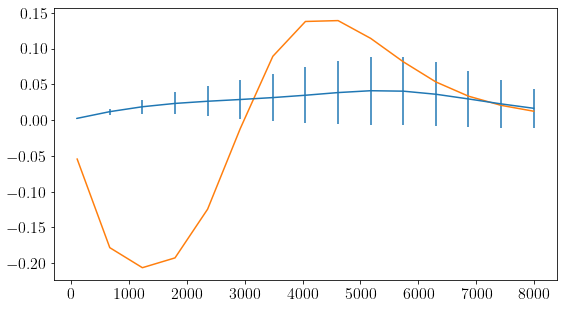

In [29]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [30]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['hf'])# np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])

In [40]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-7
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]
comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot + delta_p_over_p*param_fiducial_values[i]*cl_lens 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot - delta_p_over_p*param_fiducial_values[i]*cl_lens 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [41]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[0.27671205 0.01560102]


In [43]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    print(snr)
    if i==0:
        print('2snr, ie the snr on ffree',2.*snr)

3.613864993644112
2snr, ie the snr on ffree 7.227729987288224
64.09838183751812


In [70]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'gal_lens_hf,gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',

'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',



        
# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 108.9509 seconds


In [71]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['hf'])#np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

22.431731982622733
44.863463965245465


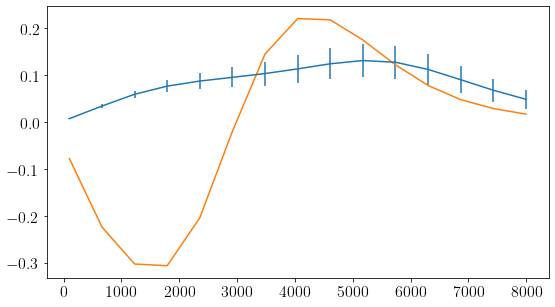

In [72]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [73]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['hf'])# np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])

In [74]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-9
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]
comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot + delta_p_over_p*param_fiducial_values[i]*cl_lens 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot - delta_p_over_p*param_fiducial_values[i]*cl_lens 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [75]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[0.06267155 0.0098793 ]


In [76]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    print(snr)
    if i==0:
        print('2snr, ie the snr on ffree',2.*snr)

15.956203542008442
2snr, ie the snr on ffree 31.912407084016884
101.2217061971119


# halo model forecasts

### Planck x unWISE

In [126]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_in_num_filter_functions_l_fl_190122.txt',

# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',



        
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,  
        
        
'gas profile' : 'nfw', # set NFW profile
# 'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.5e-07,# green: 1.5e-07 # blue: 2.4e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 41.5571 seconds


In [127]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 3000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

1.1358331001696225
2.271666200339245


In [128]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999987642741822
2.035710004972001


In [129]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot/2.03 # bg_eff green 2.03
cl_lens = cl_lens/2.03 # bg_eff green 2.03


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

0.5595236946648386
1.1190473893296773


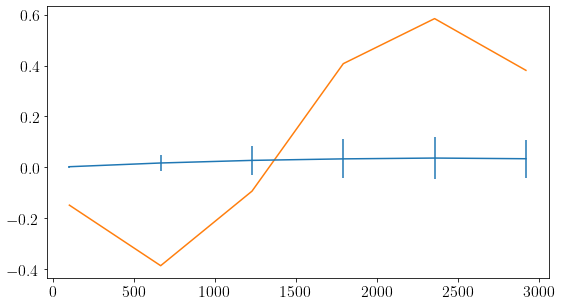

In [130]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [131]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-9
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]

cl_ksz_tot = cl_ksz_tot

comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot + delta_p_over_p*param_fiducial_values[i]*cl_lens 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot - delta_p_over_p*param_fiducial_values[i]*cl_lens 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [132]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[1.88890098 0.05873113]


In [134]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    print(snr)
    if i==0:
        print('2snr, ie the snr on ffree',2.*snr)

0.5294083752566414
2snr, ie the snr on ffree 1.0588167505132828
17.026744458529873


0.577591661928238

blue

In [135]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_in_num_filter_functions_l_fl_190122.txt',

# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',



        
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'nfw', # set NFW profile
# 'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 39.7342 seconds


In [136]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 3000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

2.384198309684496
4.768396619368992


In [137]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.4898086687397079


In [138]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot/1.49 # bg_eff blue 1.49
cl_lens = cl_lens/1.49 # bg_eff blue 1.49


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

1.6001330937479838
3.2002661874959677


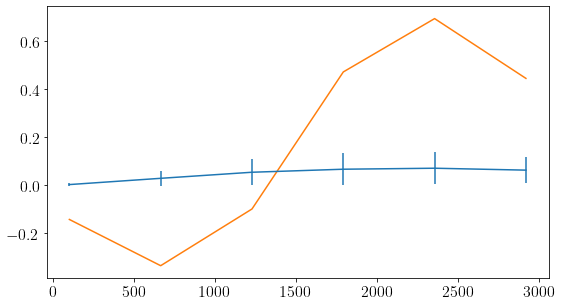

In [139]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [140]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-6
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]



comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot + delta_p_over_p*param_fiducial_values[i]*cl_lens 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot - delta_p_over_p*param_fiducial_values[i]*cl_lens 

    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)

#     cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*comps_list[i]
#     dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    
#     cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*comps_list[i]
#     dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [141]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[0.62705686 0.04536615]


In [142]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    print(snr)
    if i==0:
        print('2snr, ie the snr on ffree',2.*snr)

1.5947516989297459
2snr, ie the snr on ffree 3.1895033978594918
22.04286585429787


# same with agn profiles

In [126]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_in_num_filter_functions_l_fl_190122.txt',

# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',



        
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,  
        
        
'gas profile' : 'nfw', # set NFW profile
# 'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.5e-07,# green: 1.5e-07 # blue: 2.4e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 41.5571 seconds


In [144]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 3000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

0.5687394048415408
1.1374788096830817


In [145]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.4898086687397079


In [146]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot/2.03 # bg_eff green 2.03
cl_lens = cl_lens/2.03 # bg_eff green 2.03


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

0.28016719450322214
0.5603343890064443


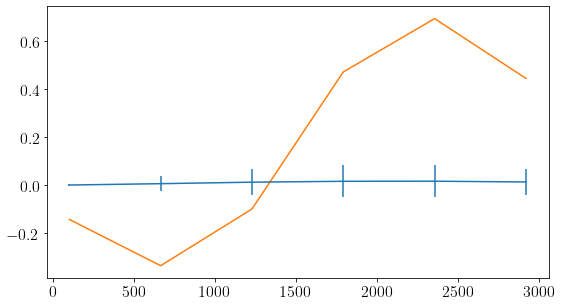

In [147]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [148]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-9
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]

cl_ksz_tot = cl_ksz_tot

comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot + delta_p_over_p*param_fiducial_values[i]*cl_lens 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot - delta_p_over_p*param_fiducial_values[i]*cl_lens 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [149]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[3.57377421 0.06194514]


In [150]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    print(snr)
    if i==0:
        print('2snr, ie the snr on ffree',2.*snr)

0.2798162225340652
2snr, ie the snr on ffree 0.5596324450681304
16.14331709959283


blue

In [151]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_in_num_filter_functions_l_fl_190122.txt',

# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',



        
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', # set Battaglia 16 profile
'gas profile mode' : 'agn',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 35.2631 seconds


In [152]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 3000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

0.5687394048415408
1.1374788096830817


In [153]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.4898086687397079


In [154]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot/1.49 # bg_eff blue 1.49
cl_lens = cl_lens/1.49 # bg_eff blue 1.49


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

0.3817042985513697
0.7634085971027395


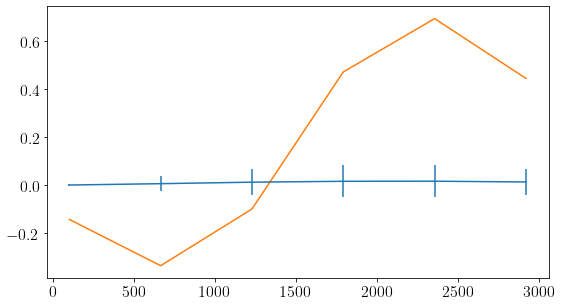

In [155]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [156]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-6
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]



comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot + delta_p_over_p*param_fiducial_values[i]*cl_lens 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot - delta_p_over_p*param_fiducial_values[i]*cl_lens 

    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)

#     cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*comps_list[i]
#     dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    
#     cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*comps_list[i]
#     dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [157]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[2.62311682 0.04546712]


In [158]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    print(snr)
    if i==0:
        print('2snr, ie the snr on ffree',2.*snr)

0.38122587334148766
2snr, ie the snr on ffree 0.7624517466829753
21.99391508989613


# AdvACT x unWISE blue

In [159]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',

'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',



        
# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'nfw', # set nfw
# 'gas profile mode' : 'agn',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 45.8675 seconds


In [160]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

52.144186863547276
104.28837372709455


In [161]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.4898086687397079


In [162]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot/1.49 # bg_eff blue 1.49
cl_lens = cl_lens/1.49 # bg_eff blue 1.49


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

34.99609856613912
69.99219713227824


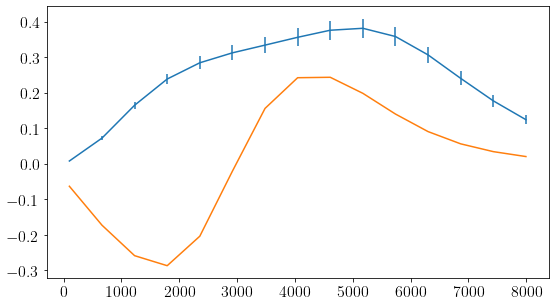

In [163]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [164]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-6
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]



comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot + delta_p_over_p*param_fiducial_values[i]*cl_lens 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot - delta_p_over_p*param_fiducial_values[i]*cl_lens 

    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)

#     cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*comps_list[i]
#     dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    
#     cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*comps_list[i]
#     dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [165]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[0.03043338 0.01879819]


In [166]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    print(snr)
    if i==0:
        print('2snr, ie the snr on ffree',2.*snr)

32.85865507903248
2snr, ie the snr on ffree 65.71731015806496
53.19661831158964


#### agn

In [167]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',

'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',



        
# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', # set nfw
'gas profile mode' : 'agn',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 60.0949 seconds


In [168]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

6.857365770975633
13.714731541951267


In [169]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.4898086687397079


In [170]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot/1.49 # bg_eff blue 1.49
cl_lens = cl_lens/1.49 # bg_eff blue 1.49


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

4.602258906695055
9.20451781339011


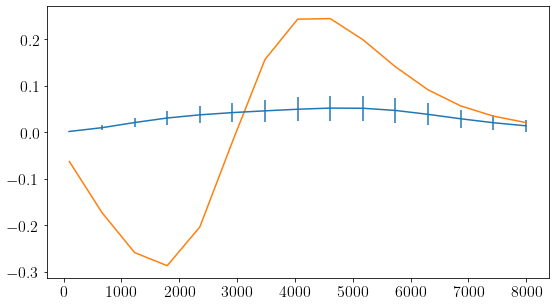

In [171]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [172]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-6
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]



comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot + delta_p_over_p*param_fiducial_values[i]*cl_lens 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot - delta_p_over_p*param_fiducial_values[i]*cl_lens 

    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)

#     cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*comps_list[i]
#     dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    
#     cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*comps_list[i]
#     dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [173]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[0.2244048  0.01908262]


In [174]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    print(snr)
    if i==0:
        print('2snr, ie the snr on ffree',2.*snr)

4.45623262729547
2snr, ie the snr on ffree 8.91246525459094
52.40369688308165


# so xunwise blue

#### agn

In [176]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/so_goal_filter_functions_l_fl_230222.txt',

'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/so_goal_nl.txt',



        
# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 10000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', # set nfw
'gas profile mode' : 'agn',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 56.5247 seconds


In [178]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 10000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

26.937906628664336
53.87581325732867


In [179]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.4898086687397079


In [180]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot/1.49 # bg_eff blue 1.49
cl_lens = cl_lens/1.49 # bg_eff blue 1.49


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

18.079131965546534
36.15826393109307


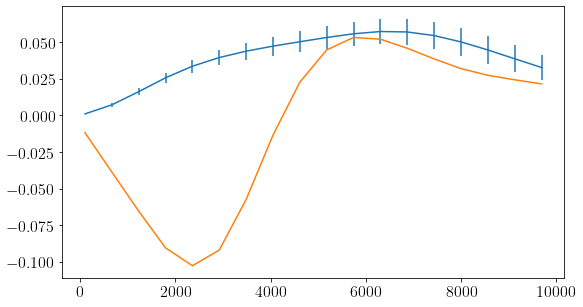

In [181]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [182]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-6
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]



comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot + delta_p_over_p*param_fiducial_values[i]*cl_lens 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot - delta_p_over_p*param_fiducial_values[i]*cl_lens 

    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)

#     cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*comps_list[i]
#     dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    
#     cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*comps_list[i]
#     dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [183]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[0.05574457 0.01997988]


In [184]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    print(snr)
    if i==0:
        print('2snr, ie the snr on ffree',2.*snr)

17.938966614976003
2snr, ie the snr on ffree 35.877933229952006
50.05033866973351


# s4xunwise blue

#### agn

In [185]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/s4_filter_functions_l_fl_230222.txt',

'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/s4_nl.txt',



        
# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 10000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', # set nfw
'gas profile mode' : 'agn',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 58.6403 seconds


In [186]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 10000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

48.94870978044708
97.89741956089416


In [187]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.4898086687397079


In [188]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot/1.49 # bg_eff blue 1.49
cl_lens = cl_lens/1.49 # bg_eff blue 1.49


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

32.85148307412556
65.70296614825112


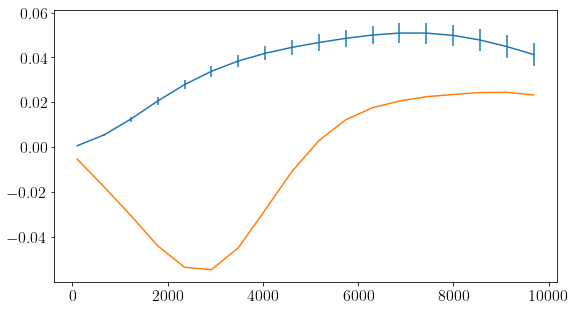

In [189]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [190]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-6
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]



comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot + delta_p_over_p*param_fiducial_values[i]*cl_lens 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot - delta_p_over_p*param_fiducial_values[i]*cl_lens 

    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)

#     cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*comps_list[i]
#     dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    
#     cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*comps_list[i]
#     dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [191]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[0.03067573 0.02041111]


In [192]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    print(snr)
    if i==0:
        print('2snr, ie the snr on ffree',2.*snr)

32.59906606407366
2snr, ie the snr on ffree 65.19813212814732
48.99292994794085


# Now fisher on gas+HOD with prior

### agn only

# remnant stuff

In [88]:
# let's plot the contours
# np.save('planck_unwise_ttg_fb_Aalpha_Abeta_160122.npy',inverse_fisher_F)

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


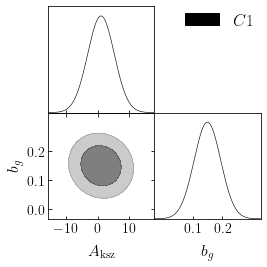

In [89]:
import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
labels = [r'A_\mathrm{ksz}', r'b_g']

# Current method
matrix1 = GaussianND(mean, inverse_fisher_F, labels = labels, names = names)
# matrix2 = GaussianND(mean, inverse_fisher_F_advact, labels = labels, names = names)

# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 19
g.settings.axes_fontsize = 17
# g.settings.axis_tick_x_rotation = 45
# g.settings.axis_tick_y_rotation = 45
# g.settings.alpha_filled_add = 0.9
# g.settings.title_limit_fontsize = 1

g.triangle_plot([matrix1], 
                names,
            filled = True,
            #share_x = True,
            legend_labels = [r'$C1$'], 
            contour_colors = ['k','purple'],
            contour_args = [{'alpha':0.5}])

# Save triplot

Planck kSZ2-g

In [3]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_1h,gal_gal_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h,kSZ_kSZ_gal_hf,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_in_num_filter_functions_l_fl_190122.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

'dlogell' : 0.,
'dell': 200.,
'ell_max' : 2800.0,
'ell_min' : 400.0,
'f_sky':0.6, 
'gas profile' : 'nfw',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 141.7266 seconds


In [7]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 3000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)

1.0362823248392565


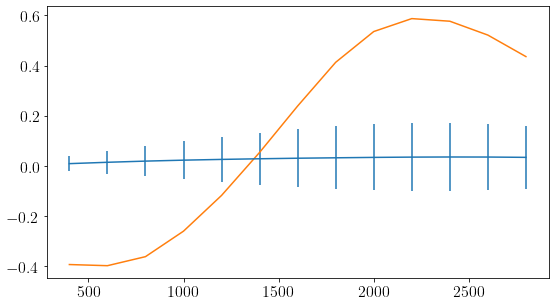

In [11]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [54]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot = np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


In [55]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-7
param_list = ['A_ksz','A_lens']
param_fiducial_values = [1.,1.]
comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*comps_list[i]
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    
    cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*comps_list[i]
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [57]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[0.97899605 0.0513717 ]


In [85]:
1/0.97899605

1.0214545809454492

advACT kSZ2-g

In [94]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_1h,gal_gal_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',        
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',
'dlogell' : 0.,
'dell': 200.,
'ell_max' : 7800.0,
'ell_min' : 400.0,
'f_sky':0.3, 
'gas profile' : 'nfw',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 95.4821 seconds


In [95]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 10000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)

22.37082133203438


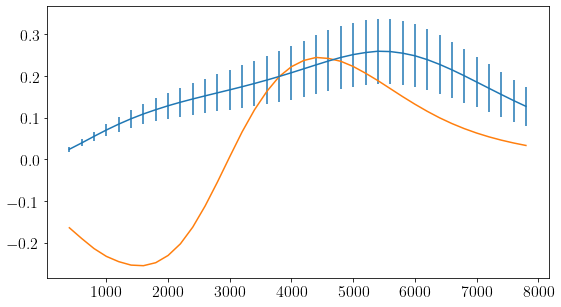

In [96]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [97]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot = np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


In [98]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-7
param_list = ['A_ksz','A_lens']
param_fiducial_values = [1.,1.]
comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*comps_list[i]
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    
    cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*comps_list[i]
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [99]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[0.05017583 0.02136475]


In [100]:
1./fisher_sigmas

array([19.92991565, 46.80606379])

In [76]:
1./0.04345354

23.013084779744066

SO kSZ2-g

In [86]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_1h,gal_gal_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/so_goal_filter_functions_l_fl_230222.txt',        
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/so_goal_nl.txt',
'dlogell' : 0.,
'dell': 200.,
'ell_max' : 9800.0,
'ell_min' : 400.0,
'f_sky':0.4, 
'gas profile' : 'nfw',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 118.9926 seconds


In [87]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 10000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)

120.47904228071909


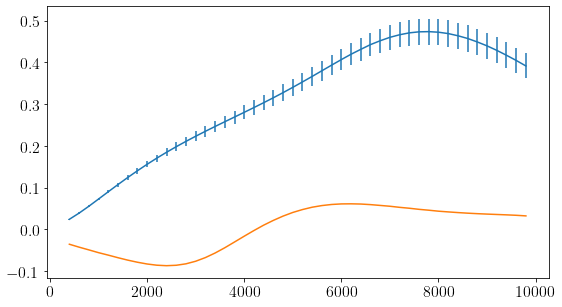

In [89]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [90]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot = np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


In [91]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-7
param_list = ['A_ksz','A_lens']
param_fiducial_values = [1.,1.]
comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*comps_list[i]
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    
    cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*comps_list[i]
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [92]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[0.00973757 0.02014536]


In [93]:
1./fisher_sigmas

array([102.69504609,  49.63923155])

S4 kSZ2-g

In [102]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_1h,gal_gal_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/s4_filter_functions_l_fl_230222.txt',        
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/s4_nl.txt',
'dlogell' : 0.,
'dell': 200.,
'ell_max' : 9800.0,
'ell_min' : 400.0,
'f_sky':0.4, 
'gas profile' : 'nfw',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 122.3076 seconds


In [121]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 10000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)

246.9284781133154


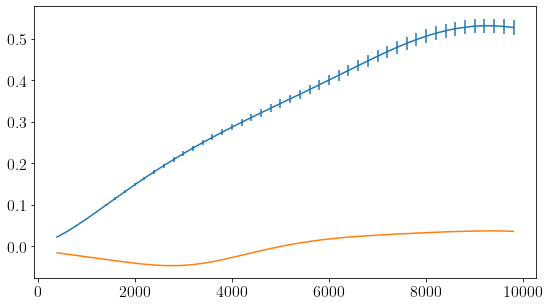

In [104]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [105]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot = np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


In [118]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-7
param_list = ['A_ksz','A_lens']
param_fiducial_values = [1.,1]
comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*comps_list[i]
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    
    cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*comps_list[i]
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [119]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[0.00485177 0.02041102]


In [120]:
1/fisher_sigmas

array([206.11017345,  48.99314841])

# HOD and galaxy distributions

In [9]:
M = Class()
M.set(ksz_params)
M.set({'output':'gal_gal_1h'})
M.compute()

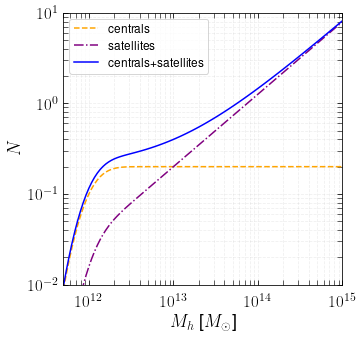

In [10]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$N$',size=title_size)
ax.set_xlabel(r'$M_h$ [$M_\odot$]',size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-2,1e1)
ax.set_xlim(5e11,1e15)
M_arr = np.geomspace(5e11,1e15,100)
get_N_centrals = np.vectorize(M.get_N_centrals)
Nc = get_N_centrals(0.,M_arr,1e12,0.25,0.2)
get_N_sats = np.vectorize(M.get_N_satellites)
Ns = get_N_sats(0.,M_arr,Nc,0.,0.8,1e13)
ax.plot(M_arr,Nc,ls='--',c='orange',label='centrals')
ax.plot(M_arr,Ns,ls='-.',c='purple',label='satellites')
ax.plot(M_arr,Ns+Nc,ls='-',c='b',label='centrals+satellites')
ax.legend(loc=2,ncol = 1,frameon=True,fontsize=12)
#plt.savefig('HOD_fig1_2106.08438.pdf')

In [27]:
M = Class()
M.set(ksz_params)
M.set(bestfit_blue_hod_params)
M.set({'output':'gal_gal_1h'
      })

M.compute()
get_ng_bar_at_z = np.vectorize(M.get_ng_bar_at_z)
get_volume = np.vectorize(M.get_volume_dVdzdOmega_at_z)
M = Class()
M.set(ksz_params)
M.set(bestfit_blue_hod_params)
M.set({'output':'gal_gal_1h',
       'alpha_s_HOD' : 0.
      })

M.compute()
get_ng_bar_2nc_at_z = np.vectorize(M.get_ng_bar_at_z)

In [28]:
z_arr = np.linspace(1e-8,4.,1000)

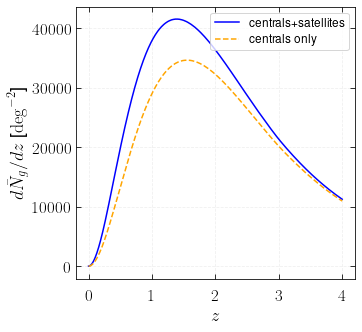

In [29]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$d\bar{N}_g/dz$    [$\mathrm{deg}^{-2}$]',size=title_size)
ax.set_xlabel(r'$z$',size=title_size)
ax.set_xscale('linear')
ax.set_yscale('linear')
# ax.set_ylim(1e0,2e3)
# ax.set_xlim(5e11,1e15)

ax.plot(z_arr,get_ng_bar_at_z(z_arr)*get_volume(z_arr)/3282.8,ls='-',c='blue',label='centrals+satellites')
ax.plot(z_arr,get_ng_bar_2nc_at_z(z_arr)*get_volume(z_arr)/3282.8/2.,ls='--',c='orange',label='centrals only')

ax.legend(loc=1,ncol = 1,frameon=True,fontsize=12)
#plt.savefig('HOD_fig1_2106.08438.pdf')



In [30]:
M = Class()
M.set(ksz_params)
M.set(bestfit_blue_hod_params)
M.set({'output':'gal_gal_1h',
       'galaxy_sample' : 'unwise',
       'galaxy_sample_id' : 'blue'
})

M.compute()
get_dNgdz_cat_blue = np.vectorize(M.get_galaxy_number_counts)
M = Class()
M.set(ksz_params)
M.set(bestfit_green_hod_params)
M.set({'output':'gal_gal_1h',
       'galaxy_sample' : 'unwise',
       'galaxy_sample_id' : 'green'
})

M.compute()
get_dNgdz_cat_green = np.vectorize(M.get_galaxy_number_counts)

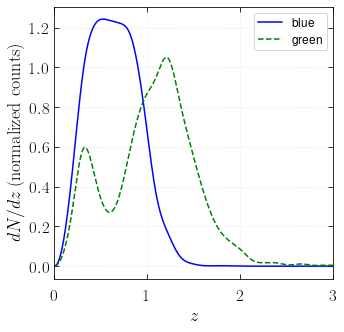

In [32]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$dN/dz$  $(\mathrm{normalized\,\,counts})$',size=title_size)
ax.set_xlabel(r'$z$',size=title_size)
ax.set_xscale('linear')
ax.set_yscale('linear')
# ax.set_ylim(1e0,2e3)
ax.set_xlim(0.,3.)

ax.plot(z_arr,get_dNgdz_cat_blue(z_arr),ls='-',c='blue',label='blue')
ax.plot(z_arr,get_dNgdz_cat_green(z_arr),ls='--',c='green',label='green')


ax.legend(loc=1,ncol = 1,frameon=True,fontsize=12)
#plt.savefig('HOD_fig1_2106.08438.pdf')




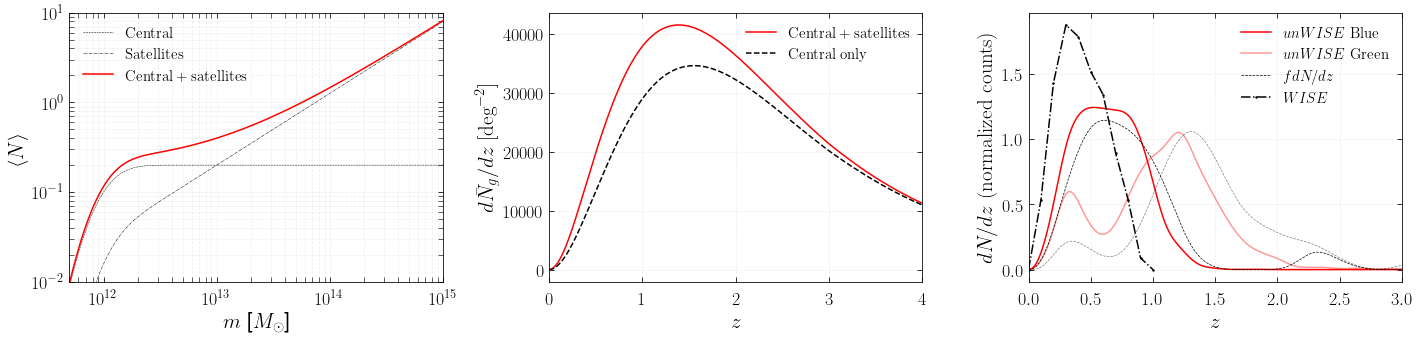

In [45]:
label_size = 18
title_size = 21
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))


ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$\langle N\rangle$',size=title_size)
ax.set_xlabel(r'$m$ [$M_\odot$]',size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-2,1e1)
ax.set_xlim(5e11,1e15)
M_arr = np.geomspace(5e11,1e15,100)
get_N_centrals = np.vectorize(M.get_N_centrals)
Nc = get_N_centrals(0.,M_arr,1e12,0.25,0.2)
get_N_sats = np.vectorize(M.get_N_satellites)
Ns = get_N_sats(0.,M_arr,Nc,0.,0.8,1e13)
ax.plot(M_arr,Nc,ls='--',c='k',label=r'$\mathrm{Central}$',lw=0.5)
ax.plot(M_arr,Ns,ls='-.',c='k',label=r'$\mathrm{Satellites}$',lw=0.5)
ax.plot(M_arr,Ns+Nc,ls='-',c='r',label=r'$\mathrm{Central+satellites}$')
ax.legend(loc=2,ncol = 1,frameon=False,fontsize=15)


ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$d\bar{N}_g/dz$    $[\mathrm{deg}^{-2}]$',size=title_size)
ax.set_xlabel(r'$z$',size=title_size)
ax.set_xscale('linear')
ax.set_yscale('linear')
# ax.set_ylim(1e0,2e3)
# ax.set_xlim(5e11,1e15)

# steradian to square degree

ax.plot(z_arr,get_ng_bar_at_z(z_arr)*get_volume(z_arr)/3282.8,ls='-',c='r',label=r'$\mathrm{Central+satellites}$')
ax.plot(z_arr,get_ng_bar_2nc_at_z(z_arr)*get_volume(z_arr)/3282.8/2.,ls='--',c='k',label=r'$\mathrm{Central\,\,only}$')

ax.legend(loc=1,ncol = 1,frameon=False,fontsize=15)

ax.set_xlim(0.,4.)

ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$dN/dz$  $(\mathrm{normalized\,\,counts})$',size=title_size)
ax.set_xlabel(r'$z$',size=title_size)
ax.set_xscale('linear')
ax.set_yscale('linear')
# ax.set_ylim(1e0,2e3)
ax.set_xlim(0.,3.)

ax.plot(z_arr,get_dNgdz_cat_blue(z_arr),ls='-',c='r',label=r'$unWISE\,\,\mathrm{Blue}$')
ax.plot(z_arr,get_dNgdz_cat_green(z_arr),ls='-',c='r',label=r'$unWISE\,\,\mathrm{Green}$',alpha=0.4)


zug, fdndzug_b, fdndzug_g, fdndzug_r = np.loadtxt('../sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_fdndz.txt',unpack=True)
ax.plot(zug,fdndzug_b,label=r'$fdN/dz$',lw=0.7,ls='--',c='k')

ax.plot(zug,fdndzug_g,lw=0.7,ls='--',c='k',alpha=0.5)
z, dnwise = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',unpack=True)

ax.plot(z,dnwise,label=r'$WISE$',c='k',marker='o',markersize=1.4,ls='-.')
ax.legend(loc=1,ncol = 1,frameon=False,fontsize=15)
fig.tight_layout()
plt.savefig('galaxies.pdf')




In [35]:
np.trapz(get_ng_bar_at_z(z_arr)*get_volume(z_arr)*get_dNgdz_cat_blue(z_arr)/3282.8,z_arr)

24627.70988141382

In [65]:
M = Class()

M.set(common_params)
M.set(cosmo_params)
M.set(ksz_params)
M.set(bestfit_green_hod_params)

# M.set({'output':'gal_gal_1h,gal_gal_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h'})
M.set({'output':'gal_gal_1h,gal_gal_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h',
       #kSZ_kSZ_gal_hf,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
#        'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_in_num_filter_functions_l_fl_190122.txt',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

# 'dlogell' : 0.,
# 'dell': 200.,
# 'ell_max' : 2800.0,
# 'ell_min' : 400.0,
'f_sky':0.5, # 0.3 for advACT, 0.4 for SO and S4, 0.5 for planck
'gas profile' : 'nfw',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':1,
      })




ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 7.5018 seconds


In [66]:
def binning(ell_class, dl_class, ell_alex, bpwf, Nellbins=9, ellmin = 100.5, ellmax = 1000.5, conv2cl=True):
    """
    Interpolate class dl's, convert ro cl's, and binn, according to alex binning scheme  
    in log 
    bwf- bandpower window function 
    """
    #interpolate and to cl's (Alex data is in cl's)
    #print(ell_class)
    dl_class = np.log(dl_class)
    f_kg = interp1d(ell_class, dl_class)
    new_ell = np.arange(2, ell_alex[15], 1) # up to 1051.5
    inter_dls=np.asarray(f_kg(new_ell))
    inter_dls = np.exp(inter_dls)
    if conv2cl==True:
        inter_cls = inter_dls*(2.0*np.pi)/(new_ell)/(new_ell+1.0)
    #binning / bandpower WF from Alex 
    clbinned = np.zeros(10)
    for i in range (10):
        wi = bpwf[i]
        # wi starts from ell=2 according to Alex, email 1-9-22; could add ell=0,1, but would contribute nothing to the sum
        ci_binned = np.sum(wi[2:1504]*inter_cls[:1502])
        #print(ci_binned)
        clbinned[i]=ci_binned
    #print(clbinned)
    return ell_alex[:10], clbinned[:10]

In [69]:
theory = M.cl_gg()
shot_noise = M.A_sn()


s_blue =  0.455
s_green =  0.648
s_red = 0.842
# /Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_external_data_and_scripts
path_data = "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_external_data_and_scripts/datapointsforunwisexcmblensing/"
path_cov = "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_external_data_and_scripts/datapointsforunwisexcmblensing/covariances/"

bpwf_gg = np.loadtxt(path_data+"cl_highL6000_sz_mask_C1+gaussian_filter20_windows_auto.txt")

alex = np.loadtxt(path_data+'Bandpowers_Auto_Sample2.dat')
cov = np.loadtxt(path_cov + "Covariance_2222_green.txt")
s = s_green

trans = np.loadtxt(path_data+'clgg_highL6000_sz_mask_C1+gaussian_filter20_smooth_green_transfer_namaster.txt')


    
ell_alex, cl_alex, sigma_alex = alex[0], alex[1], alex[2]
cov_alex = cov




cl_ell_theory = theory['ell']
dl_1h_theory = theory['1h']
dl_2h_theory = theory['2h']
dl_gg_theory = np.asarray(list(dl_1h_theory)) + np.asarray(list(dl_2h_theory))
ell_theory = np.asarray(list(cl_ell_theory))
ell_gg_binned, cl_gg_binned = binning(ell_theory, dl_gg_theory, ell_alex, bpwf_gg, Nellbins=9, ellmin = 100.5, ellmax = 1000.5, conv2cl=True)



# Cl_kxmu
theory_km =M.cl_gm()# 
cl_ell_theory_gm = theory_km['ell']
dl_1h_theory_gm = theory_km['1h']
dl_2h_theory_gm = theory_km['2h']
dl_gm_theory = np.asarray(list(dl_1h_theory_gm)) + np.asarray(list(dl_2h_theory_gm))
ell_theory = np.asarray(list(cl_ell_theory_gm))
ell_gm_binned, cl_gm_binned = binning(ell_theory, dl_gm_theory, ell_alex, bpwf_gg, Nellbins=9, ellmin = 100.5, ellmax = 1000.5, conv2cl=True)

# Cl_muxmu
theory_mm =M.cl_mm()# 
cl_ell_theory_mm = theory_mm['ell']
dl_1h_theory_mm = theory_mm['1h']
dl_2h_theory_mm = theory_mm['2h']
dl_mm_theory = np.asarray(list(dl_1h_theory_mm)) + np.asarray(list(dl_2h_theory_mm))
ell_theory = np.asarray(list(cl_ell_theory_mm))
ell_mm_binned, cl_mm_binned = binning(ell_theory, dl_mm_theory, ell_alex, bpwf_gg, Nellbins=9, ellmin = 100.5, ellmax = 1000.5, conv2cl=True)
print('sigma8',M.sigma8())
# M.struct_cleanup()
# M.empty()
cl_bin_tot  =  cl_gg_binned + 2*(5*s-2)*cl_gm_binned  + (5*s-2)*(5*s-2)*cl_mm_binned + shot_noise
cl_final = cl_bin_tot[1:]
ell = ell_gm_binned[1:]

sigma8 0.8100262035099804


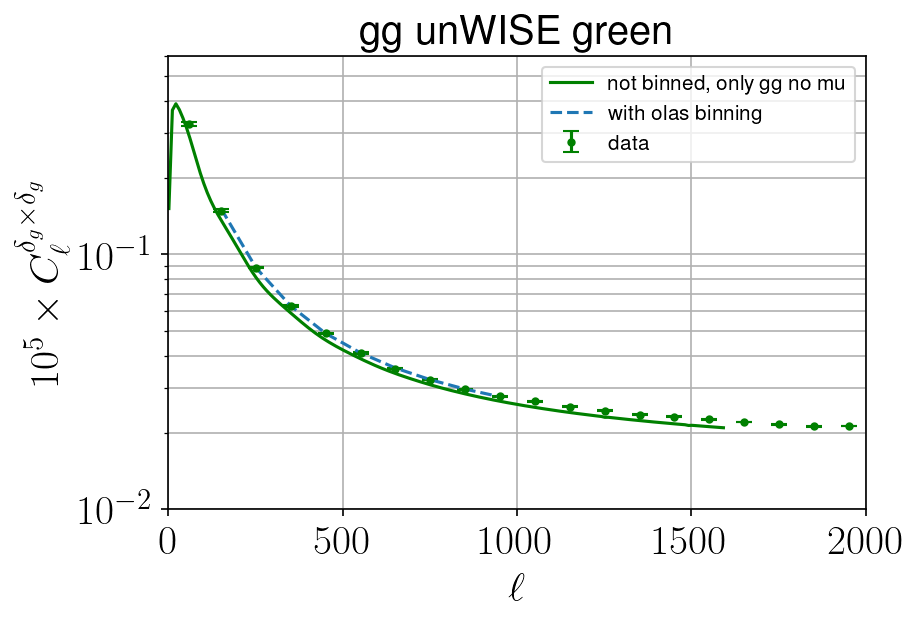

In [75]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=150)
ax.set_xlabel(r"$\ell$", fontsize=20)
ax.set_ylabel(r'$10^5 \times C_{\ell}^{\delta_{g} \times \delta_{g}} $', fontsize=20)
ax.set_title(r"gg unWISE green") #"\n" "redshift epsrel=%.7s, redshift epsabs=%.7s" "\n" "mass epsrel=%.7s, mass epsabs=%.7s" "\n" "dell=%.7s" "\n" "ndim masses=%.7s, ndim resdhifts=%.7s"%(color,pdict['redshift_epsrel'],pdict['redshift_epsabs'], pdict['mass_epsrel'],pdict['mass_epsabs'], pdict['dell'], pdict['ndim_masses'], pdict['ndim_redshifts']))
ax.errorbar(ell_alex,  1e5 * cl_alex, yerr= 1e5 *sigma_alex, fmt = ".", color = 'green', capsize=4, label="data")


l =np.asarray(M.cl_gg()['ell'])
fac = l*(l+1.)/2./np.pi
ax.plot(M.cl_gg()['ell'],1e5*np.asarray(M.cl_gg()['1h'])/fac+1e5*np.asarray(M.cl_gg()['2h'])/fac + 1e5*M.A_sn(),
       c='g',label='not binned, only gg no mu')
ax.plot(ell,1e5*cl_final,ls='--',label='with olas binning')
ax.axes.set_xlim(0,2000)
ax.axes.set_ylim(1e-2,6e-1)
ax.tick_params(axis="x", labelsize=20) 
ax.tick_params(axis="y", labelsize=20)
ax.axes.axhline(0, color='k', lw=0.4)
ax.legend(prop={'size': 10})
ax.set_yscale('log')
# ax.set_xscale('log')
ax.grid(which="both" )

plt.show()



In [79]:
M = Class()

M.set(common_params)
M.set(cosmo_params)
M.set(ksz_params)
M.set(bestfit_blue_hod_params)

# M.set({'output':'gal_gal_1h,gal_gal_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h'})
M.set({'output':'gal_gal_1h,gal_gal_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h',
       #kSZ_kSZ_gal_hf,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
#        'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_in_num_filter_functions_l_fl_190122.txt',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

# 'dlogell' : 0.,
# 'dell': 200.,
# 'ell_max' : 2800.0,
# 'ell_min' : 400.0,
'f_sky':0.5, # 0.3 for advACT, 0.4 for SO and S4, 0.5 for planck
'gas profile' : 'nfw',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':1,
      })




ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 7.7993 seconds


In [80]:
def binning(ell_class, dl_class, ell_alex, bpwf, Nellbins=9, ellmin = 100.5, ellmax = 1000.5, conv2cl=True):
    """
    Interpolate class dl's, convert ro cl's, and binn, according to alex binning scheme  
    in log 
    bwf- bandpower window function 
    """
    #interpolate and to cl's (Alex data is in cl's)
    #print(ell_class)
    dl_class = np.log(dl_class)
    f_kg = interp1d(ell_class, dl_class)
    new_ell = np.arange(2, ell_alex[15], 1) # up to 1051.5
    inter_dls=np.asarray(f_kg(new_ell))
    inter_dls = np.exp(inter_dls)
    if conv2cl==True:
        inter_cls = inter_dls*(2.0*np.pi)/(new_ell)/(new_ell+1.0)
    #binning / bandpower WF from Alex 
    clbinned = np.zeros(10)
    for i in range (10):
        wi = bpwf[i]
        # wi starts from ell=2 according to Alex, email 1-9-22; could add ell=0,1, but would contribute nothing to the sum
        ci_binned = np.sum(wi[2:1504]*inter_cls[:1502])
        #print(ci_binned)
        clbinned[i]=ci_binned
    #print(clbinned)
    return ell_alex[:10], clbinned[:10]

In [81]:
theory = M.cl_gg()
shot_noise = M.A_sn()


s_blue =  0.455
s_green =  0.648
s_red = 0.842
# /Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_external_data_and_scripts
path_data = "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_external_data_and_scripts/datapointsforunwisexcmblensing/"
path_cov = "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_external_data_and_scripts/datapointsforunwisexcmblensing/covariances/"

bpwf_gg = np.loadtxt(path_data+"cl_highL6000_sz_mask_C1+gaussian_filter20_windows_auto.txt")

alex = np.loadtxt(path_data+'Bandpowers_Auto_Sample1.dat')
cov =  np.loadtxt(path_cov +"Covariance_1111_blue.txt")
s = s_blue

trans = np.loadtxt(path_data+'clgg_highL6000_sz_mask_C1+gaussian_filter20_smooth_blue_transfer_namaster.txt')


    
ell_alex, cl_alex, sigma_alex = alex[0], alex[1], alex[2]
cov_alex = cov




cl_ell_theory = theory['ell']
dl_1h_theory = theory['1h']
dl_2h_theory = theory['2h']
dl_gg_theory = np.asarray(list(dl_1h_theory)) + np.asarray(list(dl_2h_theory))
ell_theory = np.asarray(list(cl_ell_theory))
ell_gg_binned, cl_gg_binned = binning(ell_theory, dl_gg_theory, ell_alex, bpwf_gg, Nellbins=9, ellmin = 100.5, ellmax = 1000.5, conv2cl=True)



# Cl_kxmu
theory_km =M.cl_gm()# 
cl_ell_theory_gm = theory_km['ell']
dl_1h_theory_gm = theory_km['1h']
dl_2h_theory_gm = theory_km['2h']
dl_gm_theory = np.asarray(list(dl_1h_theory_gm)) + np.asarray(list(dl_2h_theory_gm))
ell_theory = np.asarray(list(cl_ell_theory_gm))
ell_gm_binned, cl_gm_binned = binning(ell_theory, dl_gm_theory, ell_alex, bpwf_gg, Nellbins=9, ellmin = 100.5, ellmax = 1000.5, conv2cl=True)

# Cl_muxmu
theory_mm =M.cl_mm()# 
cl_ell_theory_mm = theory_mm['ell']
dl_1h_theory_mm = theory_mm['1h']
dl_2h_theory_mm = theory_mm['2h']
dl_mm_theory = np.asarray(list(dl_1h_theory_mm)) + np.asarray(list(dl_2h_theory_mm))
ell_theory = np.asarray(list(cl_ell_theory_mm))
ell_mm_binned, cl_mm_binned = binning(ell_theory, dl_mm_theory, ell_alex, bpwf_gg, Nellbins=9, ellmin = 100.5, ellmax = 1000.5, conv2cl=True)
print('sigma8',M.sigma8())
# M.struct_cleanup()
# M.empty()
cl_bin_tot  =  cl_gg_binned + 2*(5*s-2)*cl_gm_binned  + (5*s-2)*(5*s-2)*cl_mm_binned + shot_noise
cl_final = cl_bin_tot[1:]
ell = ell_gm_binned[1:]

sigma8 0.8100262035099804


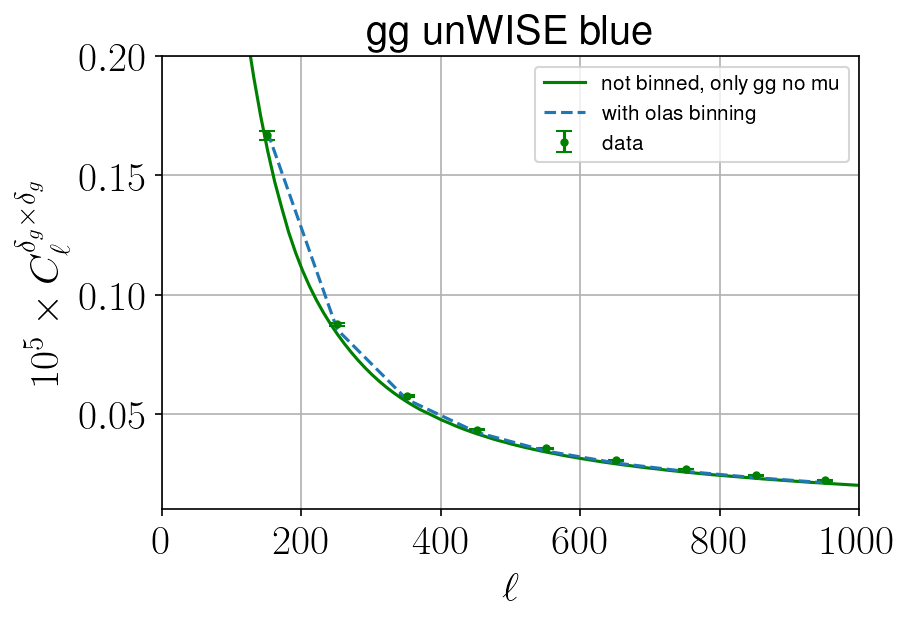

In [85]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=150)
ax.set_xlabel(r"$\ell$", fontsize=20)
ax.set_ylabel(r'$10^5 \times C_{\ell}^{\delta_{g} \times \delta_{g}} $', fontsize=20)
ax.set_title(r"gg unWISE blue") #"\n" "redshift epsrel=%.7s, redshift epsabs=%.7s" "\n" "mass epsrel=%.7s, mass epsabs=%.7s" "\n" "dell=%.7s" "\n" "ndim masses=%.7s, ndim resdhifts=%.7s"%(color,pdict['redshift_epsrel'],pdict['redshift_epsabs'], pdict['mass_epsrel'],pdict['mass_epsabs'], pdict['dell'], pdict['ndim_masses'], pdict['ndim_redshifts']))
ax.errorbar(ell_alex,  1e5 * cl_alex, yerr= 1e5 *sigma_alex, fmt = ".", color = 'green', capsize=4, label="data")


l =np.asarray(M.cl_gg()['ell'])
fac = l*(l+1.)/2./np.pi
ax.plot(M.cl_gg()['ell'],1e5*np.asarray(M.cl_gg()['1h'])/fac+1e5*np.asarray(M.cl_gg()['2h'])/fac + 1e5*M.A_sn(),
       c='g',label='not binned, only gg no mu')
ax.plot(ell,1e5*cl_final,ls='--',label='with olas binning')
ax.axes.set_xlim(0,1000)
ax.axes.set_ylim(1e-2,0.2)
ax.tick_params(axis="x", labelsize=20) 
ax.tick_params(axis="y", labelsize=20)
ax.axes.axhline(0, color='k', lw=0.4)
ax.legend(prop={'size': 10})
ax.set_yscale('linear')
# ax.set_xscale('log')
ax.grid(which="both" )

plt.show()

